In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans

import os, glob, inspect, sys


currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import epri_mc_lib as mc
from importlib import reload
reload(mc)

<module 'epri_mc_lib' from '/home/marie-anne/code/Oct20_EPRI/Task1/NB/epri_mc_lib.py'>

# Import data

In [3]:
data_path = "../../Data/Merged_data"
df = pd.read_csv(os.path.join(data_path, 'ALL_TUBE_PIPE_merge_1.csv'), 
                 index_col=0)
df.head()

,TEP_mean_uV_C,TEP_error_uV_C,Absorption_avg_500,Absorption_std_500,backscatter_avg,backscatter_std,Absorption_avg_50,Absorption_std_50,A,A std,...,Absorption_avg_100,Absorption_std_100,Absorption_avg_200,Absorption_std_200,median_CF,median_perm,median_MBN,median_CF_g,median_perm_g,median_pMBN_g
T_B1,12.947951,0.073112,0.000234,0.000018,0.0175,0.0042,0.001264,0.000519,4.410000e-13,4.090000e-07,...,0.000682,0.000193,0.000373,0.000094,1.1000,68.50,0.4730,NaN,NaN,NaN
T_B2,12.920068,0.077814,0.000571,0.000139,0.0240,0.0057,0.002486,0.000816,1.520000e-06,1.510000e-06,...,0.001069,0.000365,0.000874,0.000234,1.1095,66.45,0.6305,NaN,NaN,NaN
T_B3,12.932865,0.088762,0.000244,0.000030,0.0134,0.0028,0.001168,0.000555,4.270000e-13,5.640000e-07,...,0.000658,0.000246,0.000349,0.000078,1.0795,68.40,0.5765,NaN,NaN,NaN
T_B4,10.763517,0.071173,0.000379,0.000100,0.0146,0.0031,0.002084,0.000648,7.580000e-07,1.000000e-06,...,0.000921,0.000223,0.000701,0.000136,4.5140,32.90,0.5005,NaN,NaN,NaN
T_B5,12.942958,0.074808,0.000230,0.000033,0.0182,0.0040,0.001141,0.000447,3.970000e-13,4.670000e-07,...,0.000571,0.000113,0.000397,0.000088,1.4290,64.95,0.5380,NaN,NaN,NaN


## Calculating new values

In [4]:
calc_df = mc.updated_df(df, mc.measures_list, mc.errors_list)

In [5]:
calc_df.describe()

,TEP_mean_uV_C,TEP_error_uV_C,Absorption_avg_500,Absorption_std_500,backscatter_avg,backscatter_std,Absorption_avg_50,Absorption_std_50,A,A std,...,Absorption_avg_50_UB,Absorption_avg_100_UB,backscatter_avg_UB,A_UB,B_UB,p_UB,Absorption_avg_200_UB,AUC_avg,AUC_LB,AUC_UB
count,24.000000,24.000000,16.000000,16.000000,24.000000,16.000000,24.000000,24.000000,2.400000e+01,2.400000e+01,...,16.000000,24.000000,24.000000,24.000000,24.000000,24.000000,16.000000,2.400000e+01,2.400000e+01,2.400000e+01
mean,12.444946,0.094940,0.000356,0.000058,0.022125,0.004994,0.001851,0.000611,2.139557e-07,5.654833e-07,...,0.006752,0.001458,0.022126,0.000301,0.034944,0.206003,0.000635,2.191276e+29,-3.082447e+32,3.086829e+32
std,0.882849,0.024646,0.000108,0.000037,0.005491,0.001762,0.000614,0.000220,5.191123e-07,4.960846e-07,...,0.002025,0.000318,0.005491,0.000264,0.030404,0.111222,0.000203,5.316607e+29,2.701088e+32,2.707234e+32
min,10.763517,0.071173,0.000230,0.000018,0.013400,0.002800,0.000933,0.000210,2.010000e-13,9.860000e-08,...,0.003968,0.000920,0.013401,0.000052,0.006169,0.059678,0.000425,2.058598e+23,-9.431157e+32,5.373251e+31
25%,12.114038,0.077206,0.000273,0.000028,0.018125,0.003700,0.001373,0.000445,4.260000e-13,1.262500e-07,...,0.005129,0.001205,0.018125,0.000067,0.007849,0.085463,0.000490,4.363003e+23,-3.672279e+32,6.873007e+31
50%,12.926379,0.090211,0.000340,0.000049,0.022600,0.004650,0.001747,0.000598,1.152100e-10,4.440000e-07,...,0.006472,0.001451,0.022600,0.000237,0.027637,0.213795,0.000580,1.179950e+26,-2.422169e+32,2.422169e+32
75%,12.985953,0.102029,0.000415,0.000078,0.025700,0.005825,0.002148,0.000788,9.282500e-08,6.730000e-07,...,0.008259,0.001632,0.025701,0.000359,0.041527,0.265169,0.000726,9.506884e+28,-6.861151e+31,3.676161e+32
max,13.169977,0.182199,0.000571,0.000139,0.035900,0.008700,0.003377,0.001147,2.070000e-06,1.730000e-06,...,0.010608,0.002106,0.035900,0.000921,0.105480,0.495335,0.001109,2.120038e+30,-5.360080e+31,9.434106e+32


## Scaling values

In [6]:
scaled_df = mc.scale_general(calc_df, MinMaxScaler())[0]
scaled_df.head()

,TEP_mean_uV_C,TEP_error_uV_C,Absorption_avg_500,Absorption_std_500,backscatter_avg,backscatter_std,Absorption_avg_50,Absorption_std_50,A,A std,...,Absorption_avg_50_UB,Absorption_avg_100_UB,backscatter_avg_UB,A_UB,B_UB,p_UB,Absorption_avg_200_UB,AUC_avg,AUC_LB,AUC_UB
T_B1,0.907738,0.017461,0.010566,0.000000,0.182222,0.237288,0.135434,0.330382,1.159420e-07,0.190266,...,0.225301,0.236882,0.182219,0.190560,0.195406,0.366148,0.061110,1.159429e-07,0.809257,0.190560
T_B2,0.896151,0.059814,1.000000,1.000000,0.471111,0.491525,0.635434,0.646362,7.342995e-01,0.865146,...,0.635241,0.813818,0.471163,0.864595,0.872421,0.490493,1.000000,7.342995e-01,0.138599,0.864595
T_B3,0.901469,0.158423,0.039918,0.098855,0.000000,0.000000,0.096154,0.368786,1.091788e-07,0.285276,...,0.000000,0.247427,0.000000,0.284956,0.288286,0.363974,0.002691,1.091795e-07,0.714843,0.284956
T_B4,0.000000,0.000000,0.436748,0.678038,0.053333,0.050847,0.470949,0.467570,3.661835e-01,0.552532,...,0.183133,0.547157,0.053354,0.556354,0.559263,0.549849,0.601457,3.661835e-01,0.445141,0.556354
T_B5,0.905663,0.032736,0.000000,0.128237,0.213333,0.203390,0.085106,0.253680,9.468600e-08,0.225818,...,0.176657,0.082841,0.213333,0.226246,0.230800,0.425646,0.088330,9.468692e-08,0.773564,0.226246


## Selecting sub samples

In [7]:
tube, pipe, tube_wo_blind, tube_blind = mc.get_subsample_df(calc_df)

In [8]:
tube_scaled, pipe_scaled, tube_wo_blind_scaled, tube_blind_scaled = mc.get_subsample_df(scaled_df)

In [9]:
short_scaled_df = scaled_df.copy().loc[:,mc.without_std_g_list]
tube_scaled_short, pipe_scaled_short, \
tube_wo_blind_scaled_short, tube_blind_scaled_short = mc.get_subsample_df(short_scaled_df)

# Clustering

Automatically created module for IPython interactive environment
0


/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 8, n_neighbors = 10

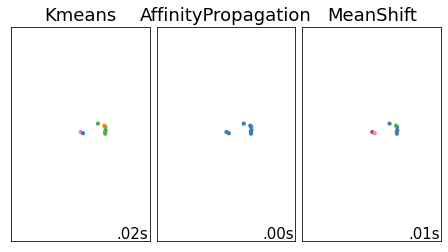

In [14]:
print(__doc__)

import time
import warnings


from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice

np.random.seed(42)
random_state = 42

plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)

plot_num = 1

default_base = {'quantile': .3, #for bandwidth of RBF kernel in meanshift
                'eps': .3, #max distance between 2 samples for DBSCAN
                'damping': .5, #the extent to which the current value is maintained relative to incoming values
                'preference': -200, #for each point - points with larger values of preferences are more likely to be chosen as exemplars.
                'n_neighbors': 4, #for k-neighbors graph for the connectivity matrix
                'n_clusters': 4, #for kmeans, ward, spectral, meanshift
                'min_samples': 3, #fot OPTICS The number of samples in a neighborhood for a point to be considered as a core point
                'xi': 0.05, #for OPTICS Determines the minimum steepness on the reachability plot that constitutes a cluster boundary.
                'min_cluster_size': 0.1 # for optics Minimum number of samples in an OPTICS cluster, expressed as an absolute number or a fraction of the number of samples
               }

datasets = [
  #  (tube_blind_scaled, {}),
   # (tube_blind_scaled_short, {}),
    (tube_wo_blind_scaled, {}),
    (tube_wo_blind_scaled_short, {}),
    (pipe_scaled, {}),
    (pipe_scaled_short, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    print(i_dataset)
    # update parameters with dataset-specific values
    params = default_base.copy()
    #params.update(algo_params) simple test

    X = dataset

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth)
    two_means = cluster.KMeans(n_clusters=params['n_clusters']) #dont need minibacth
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors") #can also be rbf
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('Kmeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()


In [10]:
len(tube)

16

## Elbow method

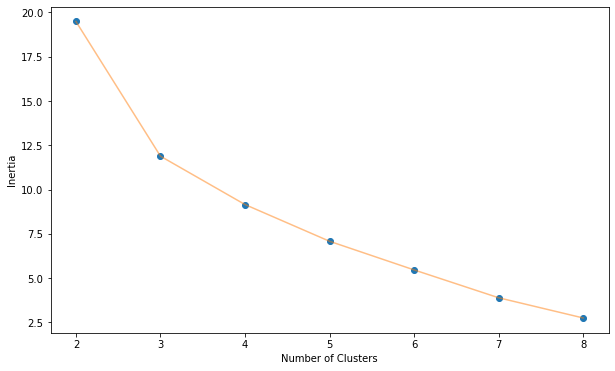

In [9]:
min_range = 2
max_range = 8

inertia = []
k_list = range(min_range, max_range+1)
feat_norm = tube_scaled_short

for k in k_list:
    km = KMeans(n_clusters = k, random_state= 0)
    km.fit(feat_norm) 
    score = km.inertia_
    inertia.append(score)


plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(min_range , max_range+1) , inertia , 'o')
plt.plot(np.arange(min_range , max_range+1) , inertia , '-' , alpha = 0.5)

plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

## Auto find K
Source: https://jtemporal.com/kmeans-and-elbow-method/

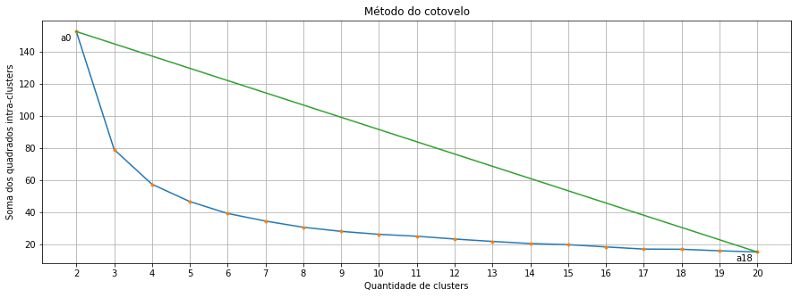

In [11]:
def calculate_wcss(data):
    '''
    Calculate within class sum-squared value which represents loss in KMeans clustering
    '''
    wcss = []
    for n in range(min_range, max_range):
        kmeans = KMeans(n_clusters=n,random_state=0)
        kmeans.fit(feat_norm)
        wcss.append(kmeans.inertia_)
    
    return wcss

from math import sqrt

def optimal_number_of_clusters(wcss):
    '''
    Calculate normal distance 
    '''
    x1, y1 = min_range, wcss[0]
    x2, y2 = max_range, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2
    

# calculating the within clusters sum-of-squares for n cluster amounts
sum_of_squares = calculate_wcss(feat_norm)
    
# calculating the optimal number of clusters
n = optimal_number_of_clusters(sum_of_squares)
print('Number of cluster =', n)

Number of cluster = 4
